In [1]:
import os, sys, getopt, pdb

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from termcolor import colored, cprint

pd.set_option("max_rows", 30)

import warnings

from IPython.display import clear_output # Used to clear the ouput of a Jupyter cell.

from progressbar import *

import numba

# Covid dataset

In [5]:
SPECS_library=pd.read_csv('/Datasets/1000Genomes/SPECS_library.csv')

In [6]:
SPECS_library

,libtxt,ID_library,batch,smiles,inchi,inkey,cmpd_name,moa,target,clinical_phase,BRD_id,BRD_moa,BRD_target,BRD_pubchemID
0,SLL_repurposing_set_SPECS,CBK000155,BJ1894240,C[C@H](Cc1ccc(OCC([O-])=O)cc1)NC[C@H](O)c1cccc...,InChI=1S/C19H22ClNO4/c1-13(21-11-18(22)15-3-2-...,ZGGNJJJYUVRADP-ACJLOTCBSA-M,BRL-37344,adrenergic receptor agonist,ADRB1|ADRB2|ADRB3,Phase 2,BRD-K07507905-236-03-4,adrenergic receptor agonist,ADRB1|ADRB2|ADRB3,9841972.0
1,SLL_repurposing_set_SPECS,CBK000156,BJ1894337,CC(C)(C)NCC(O)COc1cccc2[nH]c(=O)[nH]c12,"InChI=1S/C14H21N3O3/c1-14(2,3)15-7-9(18)8-20-1...",UMQUQWCJKFOUGV-UHFFFAOYSA-N,CGP-12177,adrenergic receptor agonist,ADRB1|ADRB2|ADRB3,Phase 1,BRD-A40084411-003-07-7,adrenergic receptor agonist,ADRB1|ADRB2|ADRB3,2687.0
2,SLL_repurposing_set_SPECS,CBK000161,BJ1894320,[H][C@@](CC)(NC(C)C)[C@]([H])(O)c1ccc(O)c2[nH]...,InChI=1S/C16H22N2O3/c1-4-12(17-9(2)3)16(21)11-...,FKNXQNWAXFXVNW-BLLLJJGKSA-N,procaterol,adrenergic receptor agonist,ADRB2,Launched,BRD-K78666826-003-02-4,adrenergic receptor agonist,ADRB2,688561.0
3,SLL_repurposing_set_SPECS,CBK000162,BJ1894196,CC(C)N[C@@H](C)[C@@H](O)COc1ccc(C)c2CCCc12,InChI=1S/C17H27NO2/c1-11(2)18-13(4)16(19)10-20...,VFIDUCMKNJIJTO-BBRMVZONSA-N,"ICI-118,551",adrenergic receptor antagonist,ADRB2|ADRB3,Phase 2,BRD-K74603273-003-01-1,adrenergic receptor antagonist,ADRB2|ADRB3,5311179.0
4,SLL_repurposing_set_SPECS,CBK000164,BJ1895498,CC(C)NCC(O)COc1ccc(COCCOC(C)C)cc1,InChI=1S/C18H31NO4/c1-14(2)19-11-17(20)13-23-1...,VHYCDWMUTMEGQY-UHFFFAOYSA-N,BISOPROLOL FUMARATE,adrenergic receptor antagonist,ADRB1,Launched,BRD-A89175223-051-14-8,adrenergic receptor antagonist,ADRB1|ADRB2,2405.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Covid_19_Tox_cpds_Helleday,CBK310019,DI1201004,Cn1c2nc(N3CCNCC3)n(Cc3nnc(o3)-c3ccc(Cl)c(Cl)c3...,InChI=1S/C20H20Cl2N8O3/c1-27-16-15(18(31)28(2)...,QXCXMVYVUHVFLP-UHFFFAOYSA-N,"7-[[5-(3,4-Dichlorophenyl)-1,3,4-oxadiazol-2-y...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
5168,Covid_19_Tox_cpds_Helleday,CBK310020,DI1201005,Brc1cccc2n(C3CCN(CC3)C(=O)Nc3ccc(I)cc3)c(=O)[n...,InChI=1S/C19H18BrIN4O2/c20-15-2-1-3-16-17(15)2...,FZLKVWWPFOLPKF-UHFFFAOYSA-N,4-(4-bromanyl-2-oxidanylidene-3~{H}-benzimidaz...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5169,Covid_19_Tox_cpds_Helleday,CBK310021,DI1201006,CCOC(=O)c1cnn(c1)-c1cccc2n(C3CCN(CC3)C(=O)Nc3c...,InChI=1S/C25H25IN6O4/c1-2-36-23(33)16-14-27-31...,OEPWHUWSLCFWPM-UHFFFAOYSA-N,ethyl 1-[1-[1-[(4-iodophenyl)carbamoyl]piperid...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5170,Covid_19_Tox_cpds_Helleday,CBK310022,DI1201007,COc1ncc(NC(=O)[C@H]2CC[C@H](CC2)n2c3cccc(N(C)C...,InChI=1S/C23H29N5O3/c1-14-12-16(13-24-22(14)31...,GBWSOFLUXXLCQJ-WOVMCDHWSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
COVID_BatchA=pd.read_csv('./Covid_dataset/COVID_BatchA.csv')
COVID_BatchA

,PlateWellCompound,Count_nuclei,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,AreaShape_Center_Y_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm,ID_covid,principal component 1,Ypredicted,Intensity_MeanIntensity_illumMITO_cells.1,Labels
0,015AM03CBK310026,193.111111,1800.254037,2425.918124,1093.845008,1152.427871,1045.463244,1103.810619,1069.132647,1127.618663,...,0.034094,0.135784,-0.012082,0.138240,0.042389,CBK310026,-18.368908,0.331364,0.008777,0
1,015AL20CBK310025,242.888889,1728.176283,2305.202711,1115.833761,1161.365196,1068.625941,1113.715763,1091.731459,1137.041226,...,0.003519,0.030487,0.027094,-0.019137,-0.004051,CBK310025,-21.868891,0.363805,0.008477,0
2,015AM05CBK310024,199.000000,1752.473795,2362.270982,1103.365280,1137.814079,1055.657555,1089.743856,1079.003305,1113.304014,...,-0.032270,-0.019920,0.020209,0.031901,0.039423,CBK310024,-18.480635,0.333605,0.008487,0
3,015AL22CBK310023,226.555556,1986.790362,2626.938955,1131.691573,1115.502430,1081.084579,1064.466968,1105.880512,1089.501774,...,0.050925,-0.084664,0.028926,-0.009254,0.000593,CBK310023,-71.248506,0.886842,0.005784,1
4,015AM18CBK310022,197.222222,1727.657115,2330.338123,1086.800230,1144.507585,1039.318721,1096.989619,1062.571514,1120.267519,...,0.048515,0.062975,-0.019302,0.009554,0.011530,CBK310022,-17.834384,0.318207,0.008265,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5171,013AI10CBK011630,203.777778,1667.161061,2267.327924,1145.113236,1132.118069,1098.520189,1085.224386,1121.318458,1108.192044,...,-0.048695,0.029586,-0.011567,-0.031315,-0.000992,CBK011630,10.359268,0.023291,0.009815,0
5172,010AC09CBK011601,203.777778,1615.980907,2212.390640,1117.780128,1065.920552,1071.824189,1019.814822,1094.312557,1042.373580,...,-0.043562,0.081066,-0.038034,-0.040628,0.102667,CBK011601,22.727445,-0.105736,0.011134,0
5173,011AH22CBK011613,158.555556,1604.295761,2231.107003,1066.248247,1090.236381,1020.215905,1044.197701,1042.740254,1066.645620,...,-0.031676,-0.036528,0.027124,-0.138079,0.001796,CBK011613,40.732749,-0.300989,0.010978,0
5174,011AO17CBK000256,172.555556,1598.984046,2182.850860,1092.243045,1146.370058,1046.769480,1100.123443,1068.988065,1122.763485,...,0.058061,-0.003082,-0.009142,0.006090,-0.046265,CBK000256,21.125227,-0.081196,0.009783,0


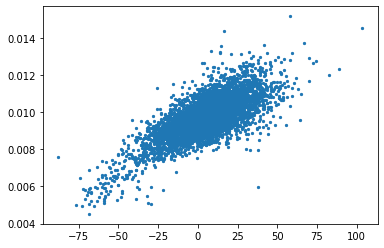

In [29]:
plt.scatter(COVID_BatchA['principal component 1'],COVID_BatchA['Intensity_MeanIntensity_illumMITO_cells.1'],s=5)

(array([  1.,   0.,   0.,   0.,   1.,   1.,   2.,   4.,   8.,   2.,   5.,
          8.,  11.,   7.,  10.,  11.,  11.,  12.,  10.,  11.,  20.,  18.,
         26.,  35.,  30.,  44.,  63.,  64.,  78., 118., 143., 144., 168.,
        211., 227., 241., 267., 271., 316., 283., 293., 294., 256., 203.,
        201., 192., 146., 112., 123.,  96.,  80.,  77.,  54.,  42.,  31.,
         21.,  14.,  11.,  15.,  10.,   5.,   5.,   2.,   3.,   1.,   1.,
          1.,   2.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([-88.11684333, -85.72058615, -83.32432898, -80.9280718 ,
        -78.53181463, -76.13555745, -73.73930028, -71.3430431 ,
        -68.94678593, -66.55052875, -64.15427158, -61.7580144 ,
        -59.36175723, -56.96550005, -54.56924287, -52.1729857 ,
        -49.77672852, -47.38047135, -44.98421417, -42.587957  ,
        -40.19169982, -37.79544265, -35.39918547, -33.0029283 ,
        -30.60667112, -28.21041395, -25.81415677, -23.41789959,
      

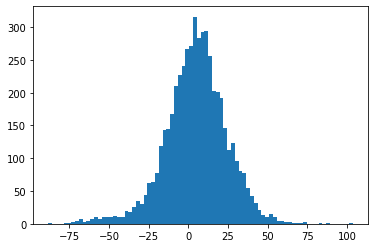

In [28]:
plt.hist(COVID_BatchA['principal component 1'],bins=80)

In [23]:
COVID_BatchA['principal component 1'].describe()

count    5176.000000
mean        4.700312
std        19.524226
min       -88.116843
25%        -6.498735
50%         5.241598
75%        16.759972
max       103.583731
Name: principal component 1, dtype: float64

In [340]:
COVID_BatchA.loc[COVID_BatchA['Intensity_MeanIntensity_illumMITO_cells.1']<0.0062]

,PlateWellCompound,Count_nuclei,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,AreaShape_Center_Y_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm,ID_covid,principal component 1,Ypredicted,Intensity_MeanIntensity_illumMITO_cells.1,Labels
3,015AL22CBK310023,226.555556,1986.790362,2626.938955,1131.691573,1115.502430,1081.084579,1064.466968,1105.880512,1089.501774,...,0.050925,-0.084664,0.028926,-0.009254,0.000593,CBK310023,-71.248506,0.886842,0.005784,1
115,007AC22CBK309668,169.625000,1965.097184,2595.377267,1058.464510,1125.169218,1008.057902,1074.942955,1032.754123,1099.562598,...,0.038646,0.024197,0.078916,0.038451,-0.036739,CBK309668,-63.553128,0.792346,0.005212,1
150,006AM06CBK309632,227.000000,1611.771041,2124.037367,1119.138612,1150.172857,1073.549324,1104.532836,1095.848135,1126.845541,...,-0.005260,0.027767,-0.006606,-0.026456,-0.010475,CBK309632,-38.884246,0.536939,0.005311,1
220,015AE07CBK309561,225.777778,1925.998000,2538.970375,1093.966118,1105.168160,1043.963252,1055.513618,1068.473959,1079.822371,...,-0.035706,-0.046850,0.006819,0.048778,0.014422,CBK309561,-67.412340,0.833490,0.005662,1
287,014AC15CBK309493,196.000000,1938.200512,2570.021741,1118.822018,1080.600841,1068.634274,1030.647724,1093.243034,1055.110643,...,0.076532,-0.005861,-0.036521,-0.028085,-0.045128,CBK309493,-56.741337,0.722682,0.005609,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4647,006AE21CBK041013,193.333333,1896.825827,2493.003648,1128.026066,1100.857441,1078.662160,1051.196624,1102.847012,1075.539756,...,-0.048454,0.004615,-0.095968,0.032793,-0.021913,CBK041013,-67.446449,0.845969,0.005226,1
4734,003AN09CBK040880,289.888889,1974.736705,2595.385566,1110.459230,1114.873528,1059.926384,1064.531285,1084.697050,1089.196384,...,0.026534,0.022378,0.014535,-0.036913,-0.006820,CBK040880,-62.135134,0.792902,0.005446,1
4784,005AA19CBK024349,227.333333,1773.961747,2341.319182,1091.551531,1101.315485,1043.498847,1053.483459,1067.017106,1076.907521,...,0.044266,-0.016569,0.021424,0.034823,-0.029848,CBK024349,-59.340695,0.750003,0.005229,1
5022,012AO14CBK011602H,202.222222,1892.545779,2498.830914,1115.607963,1112.915556,1066.131797,1063.427705,1090.397920,1087.616386,...,0.103111,0.071768,-0.000839,0.045000,0.000072,CBK011602H,-54.960311,0.713962,0.006019,1


In [7]:
COVID_BatchA.columns

Index(['PlateWellCompound', 'Count_nuclei', 'AreaShape_Area_nuclei',
       'AreaShape_BoundingBoxArea_nuclei',
       'AreaShape_BoundingBoxMaximum_X_nuclei',
       'AreaShape_BoundingBoxMaximum_Y_nuclei',
       'AreaShape_BoundingBoxMinimum_X_nuclei',
       'AreaShape_BoundingBoxMinimum_Y_nuclei', 'AreaShape_Center_X_nuclei',
       'AreaShape_Center_Y_nuclei',
       ...
       'RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm',
       'RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm',
       'RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm',
       'RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm',
       'RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm', 'ID_covid',
       'principal component 1', 'Ypredicted',
       'Intensity_MeanIntensity_illumMITO_cells.1', 'Labels'],
      dtype='object', length=1884)

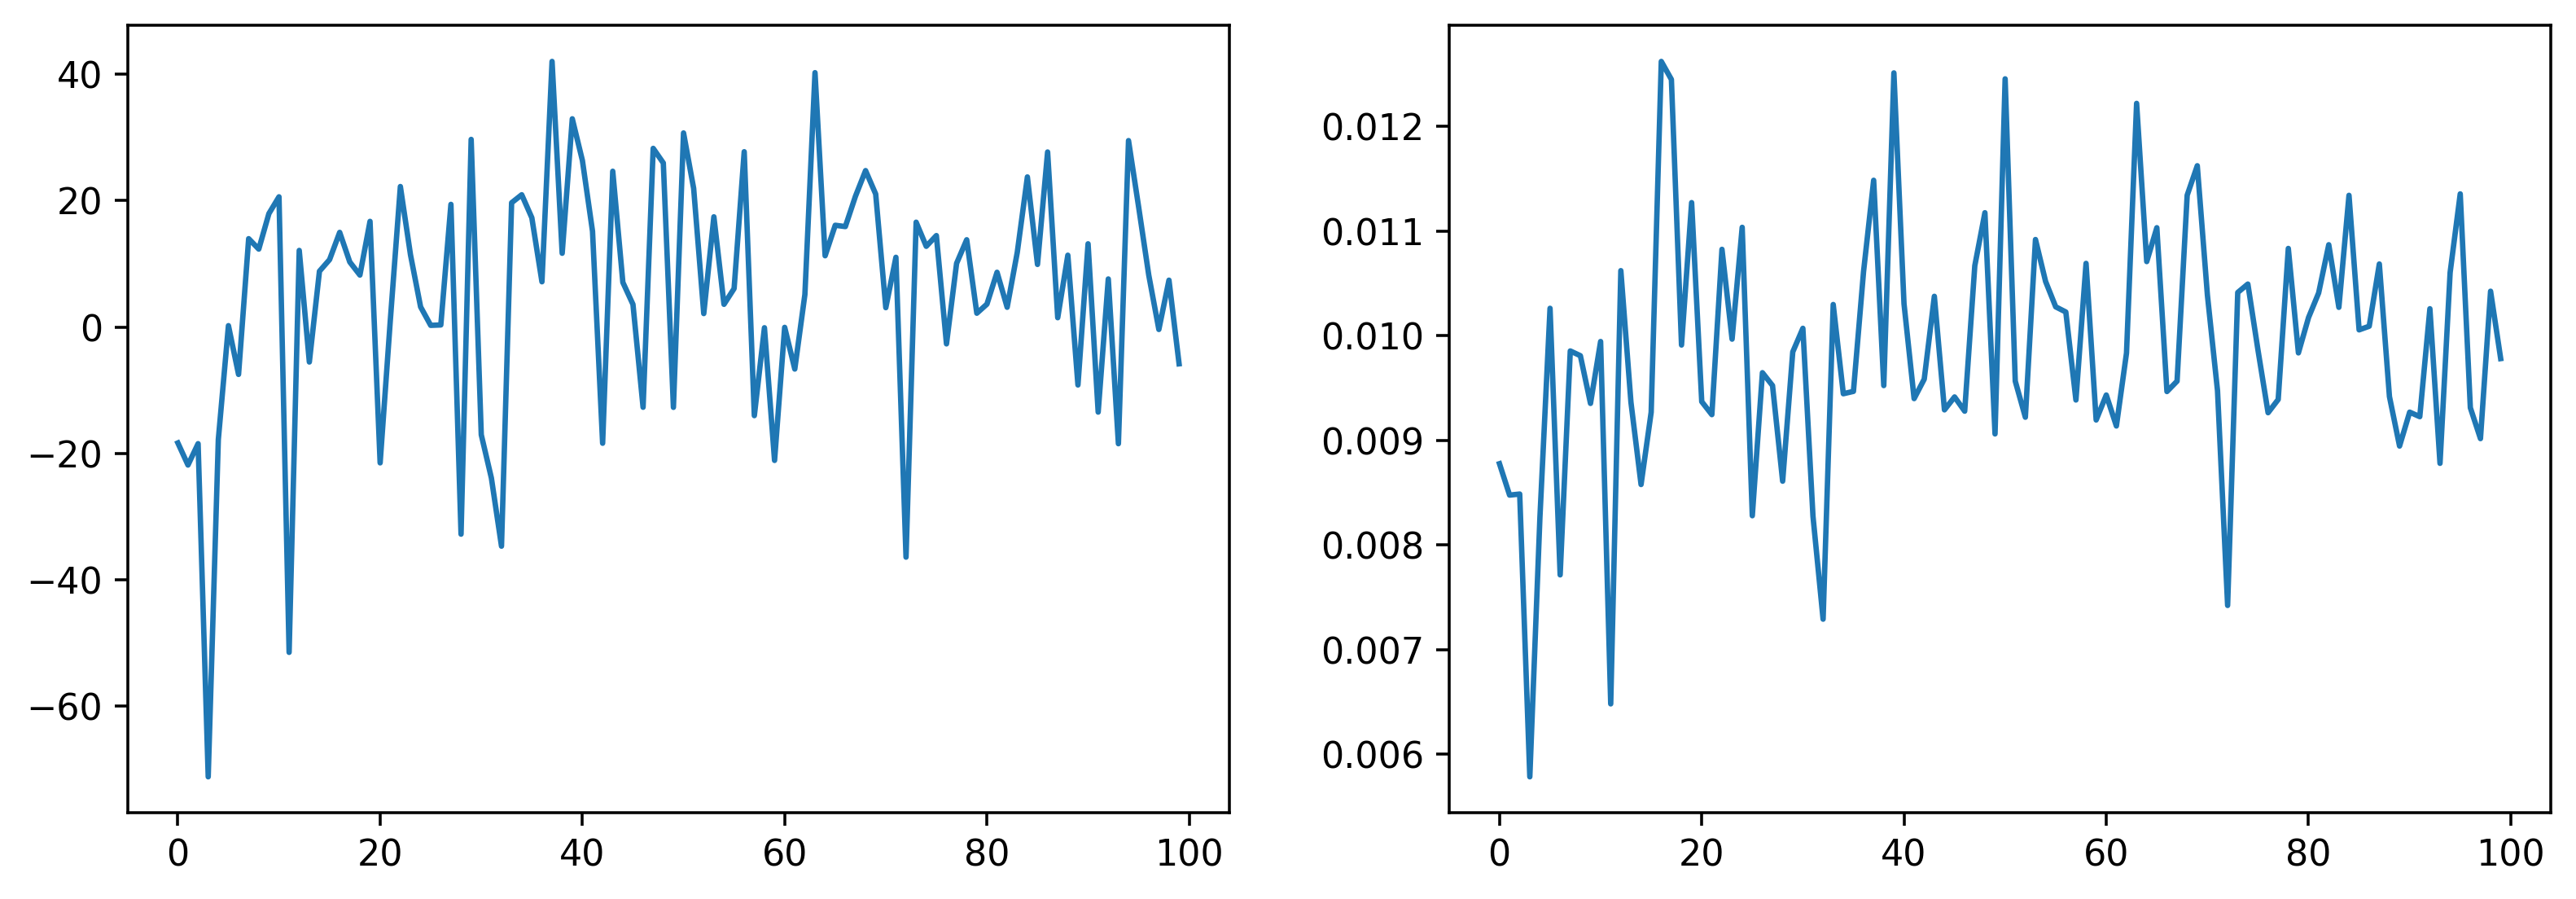

In [8]:
plt.figure(22,figsize=(12,4), dpi=320)
plt.subplot(1,2,1)
plt.plot(COVID_BatchA['principal component 1'][0:100])
plt.subplot(1,2,2)
plt.plot(COVID_BatchA['Intensity_MeanIntensity_illumMITO_cells.1'][0:100])

In [26]:
BatchA_for_training=pd.read_csv('./Covid_dataset/BatchA_for_training.csv')
BatchA_for_training

,ID_library,SMILES,Intensity_MeanIntensity_illumMITO_cells.1,Labels,MOL,FRAGS,LOGP,HAC
0,CBK309065,CC1=NN=C2N1C(SC(C)=C3C)=C3C(C4=CC=C(Cl)C=C4)=N...,0.009294,0,"<svg xmlns=""http://www.w3.org/2000/svg"" xmlns:...",1,5.77026,65
1,CBK041145,[H][C@@]12COP([O-])(=O)O[C@@]1([H])[C@@H](O)[C...,0.009393,0,"<svg xmlns=""http://www.w3.org/2000/svg"" xmlns:...",1,-0.76160,24
2,CBK200894,CC1CS(=O)(=O)CCN1N=Cc1ccc(o1)[N+]([O-])=O,0.009726,0,"<svg xmlns=""http://www.w3.org/2000/svg"" xmlns:...",1,0.64060,19
3,CBK309015,O=C(N1)SC(CC2=CC=C(OCC(N3C)=NC4=C(C=CC=C4)C3=O...,0.011022,0,"<svg xmlns=""http://www.w3.org/2000/svg"" xmlns:...",1,2.40660,28
4,CBK041791,Fc1ccc(cc1)C(c2ccccc2)(c3ccccc3F)n4ccnc4,0.009869,0,"<svg xmlns=""http://www.w3.org/2000/svg"" xmlns:...",1,5.00150,26
...,...,...,...,...,...,...,...,...
5150,CBK021021G,O=[Mg].O=[Mg].O=[Mg].O=[Si]=O.O=[Si]=O.O=[Si]=...,0.009787,0,"<svg xmlns=""http://www.w3.org/2000/svg"" xmlns:...",1,-0.61840,3
5151,CBK278033,OC1=CC=C2[C@@H](C3=CC=C(OCCN4CCCC4)C=C3)[C@@H]...,0.008873,0,"<svg xmlns=""http://www.w3.org/2000/svg"" xmlns:...",1,5.72870,31
5152,CBK290260,ClC(Cl)C(=O)[O-],0.008799,0,"<svg xmlns=""http://www.w3.org/2000/svg"" xmlns:...",1,0.87470,6
5153,CBK290471G,C[C@@H](SC3)O[C@@]13CN2CCC1CC2.C[C@H](SC6)O[C@...,0.009326,0,"<svg xmlns=""http://www.w3.org/2000/svg"" xmlns:...",1,1.56020,13


In [120]:
all_tier=pd.DataFrame()
all_tier['No.']=range(len(COVID_BatchA))
all_tier['ints']=COVID_BatchA['Intensity_MeanIntensity_illumMITO_cells.1']
all_tier['req_time']=0
all_tier['time_untouched']=0
all_tier['weight']=COVID_BatchA['principal component 1']+100
all_tier['temp']=0.5
all_tier['size']=500
all_tier['time_touched']=0

In [121]:
all_tier.loc[all_tier['ints']<0.0085]

,No.,ints,req_time,time_untouched,weight,temp,size,time_touched
1,1,0.008477,0,0,78.131109,0.5,500,0
2,2,0.008487,0,0,81.519365,0.5,500,0
3,3,0.005784,0,0,28.751494,0.5,500,0
4,4,0.008265,0,0,82.165616,0.5,500,0
6,6,0.007715,0,0,92.484877,0.5,500,0
...,...,...,...,...,...,...,...,...
5118,5118,0.008151,0,0,92.339262,0.5,500,0
5125,5125,0.008433,0,0,104.820946,0.5,500,0
5128,5128,0.008308,0,0,83.022067,0.5,500,0
5130,5130,0.007897,0,0,82.213694,0.5,500,0


In [839]:
for i in range(1000):
    req=pd.DataFrame({'No.':all_tier['No.'],'request':0,'response':all_tier['weight']})
    no_list=list(all_tier.loc[all_tier['ints']<0.0062,'No.'].sample(frac=0.9))+list(all_tier.loc[(all_tier['ints']>0.0062) & (all_tier['ints']<0.0086) ,'No.'].sample(frac=0.8))
    print('No:',len(no_list))
    req.loc[req['No.'].isin(no_list),'request']=1
    print(len(req.loc[req['request']==1]))
    req.to_csv('./Covid_dataset/Requests_1000/req_%d.csv'%i)

No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 

No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 500
500
No: 

# RL

In [31]:
#for each tier
class env:
    
    def __init__(self,tier):
        ## tier info
        self.initial_tier=tier
        self.tier=tier
        self.actions=list(self.tier['No.'])
        ## wating time
        self.s3=0
        #self.return=0
    
    def reset(self):
        self.tier=self.initial_tier
        #self.return=0
    
    def action_space(self):
        return self.actions
            
    
    def step(self,requestsDF,beta=0.05):
        
        ## calculate reward
        requested=requestsDF.loc[requestsDF['request']==1].loc[requestsDF['No.'].isin(self.tier['No.'])]
        xn=len(requested)
        response_times=list(requested['response'])
        if xn==0:
            rewards=0
        else:
            time_diff=np.arange(0,1,1/xn)
            rewards=0
            for i in range(xn):
                rewards+=response_times[i]*np.exp(-beta*time_diff[i])
            rewards=rewards/xn
        
        ## calculate states s1,s2,s3
        if len(self.tier)==0:
            s1=0
            s2=0  ## set it to be large enough
            s3=0
        else:
            ### s1
            s1=self.tier['temp'].mean()
            ###s2
            s2=sum([self.tier['temp'][i]*self.tier['ints'][i] for i in self.tier.index])/len(self.tier)
            ### s3
            s3=sum(self.tier['weight'])
        
        return s1,s2,s3,rewards
    
    def update_or_not(self, file, T_or_F):
        fileNo=int(file['No.'])
        if T_or_F==True:
            if fileNo in list(self.tier['No.']):
                self.tier=self.tier.drop(self.tier.loc[self.tier['No.']==fileNo].index).reset_index(drop=True)
            else:
                self.tier=pd.concat([self.tier,file],ignore_index=True)
        else:
            pass
        
    def add_file(self,file):
        # if already in, then pass
        '''if int(file['No.']) in self.tier['No.']:
            pass
        else:'''
        self.tier=pd.concat([self.tier,file],ignore_index=True)
        
    def remove_file(self,file):
        self.tier=self.tier.drop(self.tier.loc[self.tier['No.']==int(file['No.'])].index).reset_index(drop=True)

In [32]:
## Naturally decreasement of temp
def temp_decrease(tier1,tier2,tier3,Request,timestep):
    
    req_No=list(Request.loc[Request['request']==1,'No.'])
    
    for i in list(tier1['No.']):
        if i in req_No:
            tier1.loc[tier1['No.']==i,'time_untouched']=0
        else:
            ##increase untouched time by 1
            tier1.loc[tier1['No.']==i,'time_untouched']+=1
            ## decrease temp by 0.05 after $timestep times untorched
            if int(tier1.loc[tier1['No.']==i,'time_untouched'])%timestep==0:
                tier1.loc[tier1['No.']==i,'temp']-=0.05
            if float(tier1.loc[tier1['No.']==i,'temp'])<0.1:
                tier1.loc[tier1['No.']==i,'temp']=0.1
                
    for i in list(tier2['No.']):
        if i in req_No:
            tier2.loc[tier2['No.']==i,'time_untouched']=0
        else:
            ##increase untouched time by 1
            tier2.loc[tier2['No.']==i,'time_untouched']+=1
            ## decrease temp by 0.05 after $timestep times untorched
            if int(tier2.loc[tier2['No.']==i,'time_untouched'])%timestep==0:
                tier2.loc[tier2['No.']==i,'temp']-=0.05
            if float(tier2.loc[tier2['No.']==i,'temp'])<0.1:
                tier2.loc[tier2['No.']==i,'temp']=0.1

    for i in list(tier3['No.']):
        if i in req_No:
            tier3.loc[tier3['No.']==i,'time_untouched']=0
        else:
            ##increase untouched time by 1
            tier3.loc[tier3['No.']==i,'time_untouched']+=1
            ## decrease temp by 0.05 after $timestep times untorched
            if int(tier3.loc[tier3['No.']==i,'time_untouched'])%timestep==0:
                tier3.loc[tier3['No.']==i,'temp']-=0.05
            if float(tier3.loc[tier3['No.']==i,'temp'])<0.1:
                tier3.loc[tier3['No.']==i,'temp']=0.1

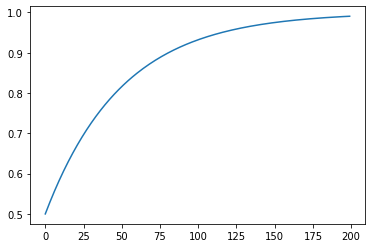

In [495]:
plt.plot([1-0.5/np.exp(0.02*x) for x in range(200)])

In [496]:
def hot_cold(tier,file):
    tier.loc[tier['No.']==int(file['No.']),'req_time']+=1
    file=tier.loc[tier['No.']==int(file['No.'])]
    ## weight/request_time as probability ratio
    ratio=1-1/(1+np.exp(5000*7.33/10000)*np.exp(-(7.33/10000)*float(file['size']/file['req_time'])))
    
    ##if file is cold, change it to hot according to the weight/req_time ratio
    if float(file['temp'])<0.5:
        if random.random()<0.5*ratio:
            temp=1-0.5/np.exp(0.02*file['req_time'].item())
            file['temp']=temp
            tier.loc[tier['No.']==int(file['No.'])]=file
        else:
            pass
     ##if the file is hot, increase temperatue by requests time
    else:
        temp=1-0.5/np.exp(0.02*file['req_time'].item())
        file['temp']=temp
        tier.loc[tier['No.']==int(file['No.'])]=file


In [35]:
class TDAgent():
    
    def __init__(self,n_states,p_init,beta,lam,a_i,b_i):
        self.n_states = n_states
        # parameters of cost-to-go func
        self.p = np.array(p_init)
        # parameters of FRB func
        self.a1,self.a2,self.a3 = a_i
        self.b1,self.b2,self.b3 = b_i
        # parameters of TD
        self.alpha= [0]*len(self.p)
        self.beta = beta
        self.lam  = lam
        # eligibility trace
        self.z = [0]*len(self.p)
        
    def act(self, state):
        # Random
        return np.random.choice(self.n_actions)
    
    def cost_phi(self,state):
        s1,s2,s3=state
        ## membership function /mu
        mu_L1=(1/(1+self.a1*np.exp(-self.b1*s1)))
        mu_S1=1-mu_L1
        mu_L2=(1/(1+self.a2*np.exp(-self.b2*s2)))
        mu_S2=1-mu_L2
        mu_L3=(1/(1+self.a3*np.exp(-self.b3*s3)))
        mu_S3=1-mu_L3
        ## weight w^i
        w=[]
        for i in [mu_S1,mu_L1]:
            for j in [mu_S2,mu_L2]:
                for k in [mu_S3,mu_L3]:
                    w.append(i*j*k)
        ## basis function /phi
        phi=[]
        for i in w:
            phi_i=i/sum(w)
            phi.append(phi_i)
        #phi=np.array(phi)
        ## cost function C
        C=self.p.dot(np.array(phi))
        return C,phi
    
    def learn(self, state, reward, state_next, phi_list):
        # get s1,s2,s3(n,n+1), phi_list
        s1_not,s2_not,s3_not=state
        s1_up, s2_up, s3_up =state_next
        phi_list=np.array(phi_list)
        
        # calculate C(sn,pn)
        C_n,phi_n=self.cost_phi(state)
        
        # calculate C(sn+1,pn)
        C_n_1,phi=self.cost_phi(state_next)

        # learning rate(N=100)
        for i in range(len(self.alpha)):
            self.alpha[i]=(0.1/(1+100*sum(phi_list[:-1,i])))

        # eligibility trace
        for i in range(len(self.z)):
            self.z[i]=self.lam*np.exp(-self.beta*s3_not)*self.z[i]+phi_n[i]

        # update p
        for i in range(len(self.p)):
            self.p[i]=self.p[i]+self.alpha[i]*(reward+np.exp(-self.beta*s3_not)*C_n_1-C_n)*self.z[i]

        # return [phi^i] for phi_list
        return phi
            
    
    def c_up_c_not(self,tier,file,requestsDF):
        fileNo=int(file['No.'])
        requested=requestsDF.loc[requestsDF['request']==1].loc[requestsDF['No.'].isin(tier['No.'])]
        # if file already in tier
        if fileNo in list(tier['No.']):
            if len(tier)==0:
                s1_not=0
                s2_not=100000  ## set it to be large enough
                s3_not=0
            else:
                ### s1_not of tier(not)
                s1_not=tier['temp'].mean()
                ### s2_not of tier(not)
                s2_not=sum([tier['temp'][i]*tier['ints'][i] for i in tier.index])/len(tier)
                ### s3_not of tier(not)
                response_times=list(requested['response'])
                s3_not=sum(tier['weight'])
                #s3_not=0
            ### C_not
            C_not,_=self.cost_phi([s1_not,s2_not,s3_not])

            tier_up=tier.drop(tier.loc[tier['No.']==fileNo].index).reset_index(drop=True)
            if len(tier_up)==0:
                s1_up=0
                s2_up=0  ## set it to be large enough
                s3_up=0
            else:
                ### s1_up of tier_up(up)
                s1_up=tier_up['temp'].mean()
                ### s2_up of tier_up(up)
                s2_up=sum([tier_up['temp'][i]*tier_up['ints'][i] for i in tier_up.index])/len(tier_up)
                ### s3_up of tier_up(up)
                requested_up=requested.drop(requested.loc[requested['No.']==fileNo].index)
                response_times=list(requested_up['response'])
                s3_up=sum(tier_up['weight'])
                #s3_up=0
            ### C_up
            C_up,_=self.cost_phi([s1_up,s2_up,s3_up])
        # if file previously not in tier
        else:
            if len(tier)==0:
                s1_not=0
                s2_not=100000  ## set it to be large enough
                s3_not=0
            else:
                ### s1_not of tier(not)
                s1_not=tier['temp'].mean()
                ### s2_not of tier(not)
                s2_not=sum([tier['temp'][i]*tier['ints'][i] for i in tier.index])/len(tier)
                ### s3_not of tier(not)
                response_times=list(requested['response'])
                s3_not=sum(tier['weight'])
                #s3_not=0
            ### C_not
            C_not,_=self.cost_phi([s1_not,s2_not,s3_not])

            tier_up=pd.concat([tier,file],ignore_index=True)
            if len(tier_up)==0:
                s1_up=0
                s2_up=0  ## set it to be large enough
                s3_up=0
            else:
                ### s1_up of tier_up(up)
                s1_up=tier_up['temp'].mean()
                ### s2_up of tier_up(up)
                s2_up=sum([tier_up['temp'][i]*tier_up['ints'][i] for i in tier_up.index])/len(tier_up)
                ### s3_up of tier_up(up)
                request_file=requestsDF.loc[requestsDF['request']==1].loc[requestsDF['No.']==fileNo]
                requested_up=pd.concat([requested,request_file],ignore_index=True)
                response_times=list(requested_up['response'])
                s3_up=sum(tier_up['weight'])
                #s3_up=0
            ### C_up
            C_up,_=self.cost_phi([s1_up,s2_up,s3_up])

        return C_not,s1_not,C_up,s1_up

# Time/req

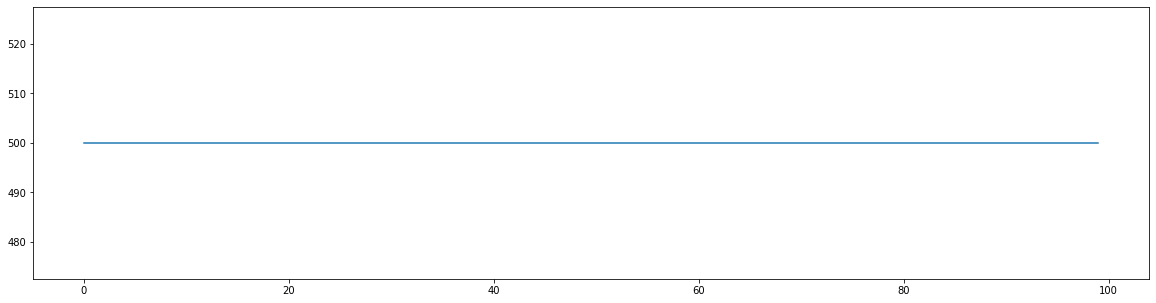

In [14]:
num_req=[]
for turn in range(100):
    req=pd.read_csv('./Requests_1000/req_%d.csv'%turn)
    num=len(req.loc[req['request']==1])
    num_req.append(num)
plt.figure(figsize=(20,5))
plt.plot(num_req)
plt.show()

In [22]:
tiA_rl=[]
Tier_list_RL=np.load('./Tier_list_RL_TD0_1000.npy',allow_pickle=True)
for turn in range(100):
    req=pd.read_csv('./Requests_1000/req_%d.csv'%turn)
    req=req.loc[req['request']==1]
    tier3=pd.DataFrame(Tier_list_RL[turn][2],columns=['No.','ints','req_time','time_untouched','weight','temp','size','time_touched'])
    tier2=pd.DataFrame(Tier_list_RL[turn][1],columns=['No.','ints','req_time','time_untouched','weight','temp','size','time_touched'])
    tier1=pd.DataFrame(Tier_list_RL[turn][0],columns=['No.','ints','req_time','time_untouched','weight','temp','size','time_touched'])
    tier3['No.']=tier3['No.'].astype('int')
    tier2['No.']=tier2['No.'].astype('int')
    tier1['No.']=tier1['No.'].astype('int')
    ti=0
    for no in req['No.']:
        if no in list(tier3['No.']):
            ti+=20
        elif no in list(tier2['No.']):
            ti+=40
        elif no in list(tier1['No.']):
            ti+=100
        else:
            print('Error: no such file in tier3/2/1')
    tiA_rl.append(ti)

In [51]:
tiA_rl

[50000,
 19260,
 18000,
 17980,
 18040,
 18100,
 18100,
 18140,
 18060,
 18240,
 18160,
 18140,
 18100,
 18040,
 18100,
 18060,
 18200,
 18180,
 18060,
 18120,
 18080,
 18140,
 18100,
 18320,
 18160,
 18200,
 18200,
 18320,
 18160,
 18020,
 18180,
 18100,
 18100,
 18060,
 18220,
 18100,
 18120,
 18140,
 18120,
 18160,
 18100,
 18080,
 18160,
 18100,
 18200,
 18000,
 18120,
 18140,
 18260,
 18160,
 18200,
 18000,
 18160,
 18200,
 18100,
 18160,
 18080,
 18140,
 18140,
 18220,
 18040,
 18140,
 18080,
 18060,
 18220,
 18060,
 18080,
 18080,
 18100,
 18120,
 18080,
 18140,
 18000,
 18180,
 18060,
 18160,
 18180,
 18100,
 18100,
 18280,
 18140,
 18040,
 18200,
 17960,
 18040,
 18000,
 18140,
 18040,
 18240,
 18020,
 18100,
 18240,
 18120,
 18060,
 18220,
 18060,
 18240,
 18180,
 18160,
 18240]

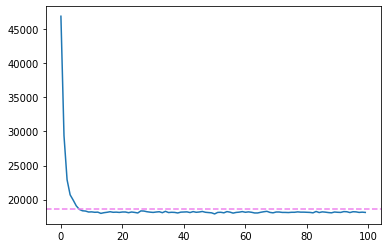

In [21]:
plt.plot(tiA_rl)
#plt.ylim(10000,15000)
plt.axhline(y=sum(tiA_rl)/100,linestyle='--',color='violet')

In [24]:
sum(tiA_rl[4:])/96

18127.708333333332

## Minimal intensity

In [21]:
len(tier3),len(tier2),len(tier3)+len(tier2)

(115, 575, 690)

In [32]:
tiA_mi=[]
tier3=all_tier[0:0]
tier2=all_tier[0:0]
tier1=all_tier[0:]
for turn in range(100):
    req=pd.read_csv('./Requests_1000/req_%d.csv'%turn)
    req=req.loc[req['request']==1]
    ti=0
    for no in req['No.']:
        if no in list(tier3['No.']):
            ti+=20
        elif no in list(tier2['No.']):
            ti+=40
        elif no in list(tier1['No.']):
            ti+=100
        else:
            print('Error: no such file in tier3/2/1')
    tiA_mi.append(ti)
    tier3=all_tier.sort_values(by='ints')[0:115]
    tier2=all_tier.sort_values(by='ints')[115:690]
    tier1=all_tier.sort_values(by='ints')[690:]

In [33]:
tiA_mi

[50000,
 18120,
 18080,
 18100,
 17980,
 18100,
 18160,
 18180,
 18080,
 18020,
 18140,
 18080,
 18180,
 18100,
 18080,
 18060,
 18060,
 18060,
 18020,
 17980,
 17960,
 18120,
 18040,
 18120,
 18000,
 18060,
 18100,
 18060,
 17920,
 18020,
 18160,
 18000,
 18180,
 18000,
 18040,
 18220,
 17960,
 18080,
 18120,
 18020,
 17960,
 18160,
 18000,
 18020,
 17960,
 18100,
 18040,
 18020,
 18060,
 18120,
 18020,
 18040,
 18060,
 18080,
 18040,
 18120,
 18040,
 18020,
 18040,
 18200,
 18040,
 18140,
 18020,
 18120,
 18020,
 17980,
 18060,
 18080,
 18000,
 18060,
 18000,
 18040,
 17940,
 18100,
 18180,
 18060,
 18100,
 18040,
 18080,
 18020,
 18100,
 18060,
 17980,
 18040,
 18060,
 18080,
 18100,
 18020,
 18120,
 18040,
 18060,
 18100,
 18080,
 18040,
 18100,
 17960,
 18120,
 18120,
 18100,
 18020]

In [34]:
sum(tiA_mi)/100

18382.4

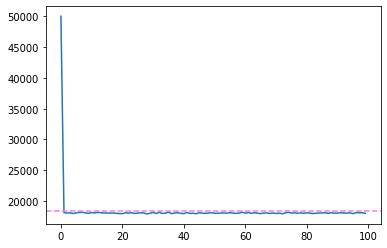

In [35]:
plt.plot(tiA_mi)
#plt.ylim(10000,15000)
plt.axhline(y=sum(tiA_mi)/100,linestyle='--',color='violet')

## LRU

In [36]:
tiA_lru=[]
tier3=all_tier[0:0]
tier2=all_tier[0:0]
tier1=all_tier[0:]
for turn in range(100):
    req=pd.read_csv('./Requests_1000/req_%d.csv'%turn)
    req_1=req.loc[req['request']==1]
    ti=0
    for no in req_1['No.']:
        if no in list(tier3['No.']):
            ti+=20
        elif no in list(tier2['No.']):
            ti+=40
        elif no in list(tier1['No.']):
            ti+=100
        else:
            print('Error: no such file in tier3/2/1')
    tiA_lru.append(ti)
    tier=pd.concat([all_tier.loc[all_tier['No.'].isin(req_1['No.'])],all_tier.loc[~all_tier['No.'].isin(req_1['No.'])]],ignore_index=True)
    tier3=tier[0:115]
    tier2=tier[115:690]
    tier1=tier[690:]

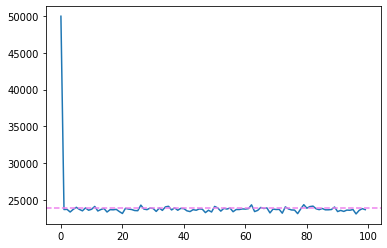

In [37]:
plt.plot(tiA_lru)
#plt.ylim(10000,15000)
plt.axhline(y=sum(tiA_lru)/100,linestyle='--',color='violet')

In [38]:
sum(tiA_lru[2:])/99-4000

19431.515151515152

## LFU

In [42]:
tiA_lfu=[]
all_tier_f=all_tier
all_tier_f['freq']=0
tier3=all_tier_f[0:0]
tier2=all_tier_f[0:0]
tier1=all_tier_f[0:]
for turn in range(100):
    req=pd.read_csv('./Covid_dataset/Requests_1000/req_%d.csv'%turn)
    req_1=req.loc[req['request']==1]
    all_tier_f.loc[all_tier_f['No.'].isin(req_1['No.']),'freq']+=1
    ti=0
    for no in req_1['No.']:
        if no in list(tier3['No.']):
            ti+=20
        elif no in list(tier2['No.']):
            ti+=40
        elif no in list(tier1['No.']):
            ti+=100
        else:
            print('Error: no such file in tier3/2/1')
    tiA_lfu.append(ti)
    tier3=all_tier_f.sort_values(by='freq',ascending=False)[0:115]
    tier2=all_tier_f.sort_values(by='freq',ascending=False)[115:690]
    tier1=all_tier_f.sort_values(by='freq',ascending=False)[690:]

In [43]:
tiA_lfu

[50000,
 23800,
 19360,
 18360,
 18180,
 18260,
 18060,
 18060,
 18080,
 18080,
 18240,
 18060,
 18120,
 17940,
 17960,
 18140,
 18060,
 18120,
 18060,
 18000,
 18160,
 18080,
 18080,
 18160,
 18080,
 18080,
 18180,
 18060,
 18120,
 18100,
 18140,
 17980,
 18120,
 18340,
 18180,
 17960,
 18020,
 18040,
 18120,
 18140,
 18120,
 18160,
 18020,
 18000,
 18140,
 18120,
 18140,
 18120,
 18100,
 18100,
 17880,
 18000,
 18060,
 18020,
 18200,
 18020,
 18060,
 17940,
 18060,
 18120,
 18180,
 18080,
 18180,
 18000,
 18020,
 18220,
 17960,
 18020,
 18040,
 18080,
 18160,
 18040,
 18100,
 18020,
 18040,
 18040,
 18060,
 18000,
 18140,
 17900,
 18100,
 18120,
 18220,
 18100,
 18020,
 17980,
 18100,
 18060,
 18040,
 18120,
 18180,
 18120,
 18000,
 18020,
 18060,
 18120,
 18120,
 17980,
 18120,
 17980]

In [44]:
sum(tiA_lfu)/100+200

18673.0

## k-means

In [126]:
from sklearn.cluster import KMeans
tiA_kmeans=[]
all_tier_f=all_tier
all_tier_f['freq']=0
tier3=all_tier_f[0:0]
tier2=all_tier_f[0:0]
tier1=all_tier_f[0:]
for turn in range(100):
    req=pd.read_csv('./Covid_dataset/Requests_1000/req_%d.csv'%turn)
    req_1=req.loc[req['request']==1]
    all_tier_f.loc[all_tier_f['No.'].isin(req_1['No.']),'freq']+=1
    ti=0
    for no in req_1['No.']:
        if no in list(tier3['No.']):
            ti+=20
        elif no in list(tier2['No.']):
            ti+=40
        elif no in list(tier1['No.']):
            ti+=100
        else:
            print('Error: no such file in tier3/2/1')
    tiA_kmeans.append(ti)
    all_tier_f['label']=KMeans(n_clusters=100, random_state=0, n_init=10).fit(all_tier_f[['freq','ints','weight']]).labels_    
    tier=all_tier_f.sort_values(by=['freq','label'],ascending=False)
    tier3=tier[0:115]
    tier2=tier[115:690]
    tier1=tier[690:]

In [127]:
sum(tiA_kmeans)/100

18469.8

## random

In [45]:
tiA_rd1=[]
all_tier=all_tier.sample(frac=1)
tier3=all_tier[0:115]
tier2=all_tier[115:690]
tier1=all_tier[690:]
for turn in range(100):
    req=pd.read_csv('./Covid_dataset/Requests_1000/req_%d.csv'%turn)
    req_1=req.loc[req['request']==1]
    ti=0
    for no in req_1['No.']:
        if no in list(tier3['No.']):
            ti+=20
        elif no in list(tier2['No.']):
            ti+=40
        elif no in list(tier1['No.']):
            ti+=100
        else:
            print('Error: no such file in tier3/2/1')
    tiA_rd1.append(ti)

In [48]:
tiA_rd1

[50000,
 46000,
 45480,
 45840,
 45460,
 45420,
 45760,
 45740,
 45640,
 45700,
 45880,
 45620,
 45640,
 45600,
 45520,
 45140,
 45660,
 45740,
 45620,
 45640,
 45680,
 45280,
 45600,
 45640,
 45540,
 45500,
 45720,
 45620,
 45560,
 45860,
 45680,
 45580,
 45320,
 45140,
 45600,
 45540,
 45840,
 45800,
 45520,
 45500,
 45460,
 45800,
 45440,
 45960,
 45580,
 45440,
 46140,
 45780,
 45260,
 45800,
 45740,
 45980,
 45680,
 45260,
 45740,
 45300,
 46100,
 45500,
 45500,
 45560,
 45600,
 45680,
 45960,
 46240,
 45960,
 45340,
 45560,
 45960,
 45580,
 45160,
 45860,
 45600,
 45700,
 45440,
 45700,
 45400,
 45460,
 45720,
 45640,
 45900,
 45560,
 45520,
 45300,
 45560,
 45560,
 45600,
 45600,
 45540,
 45560,
 45440,
 45800,
 45240,
 45460,
 45780,
 45900,
 45780,
 45780,
 45720,
 45300,
 45720]

In [47]:
tiA_rd1[0]=50000

## joint plot

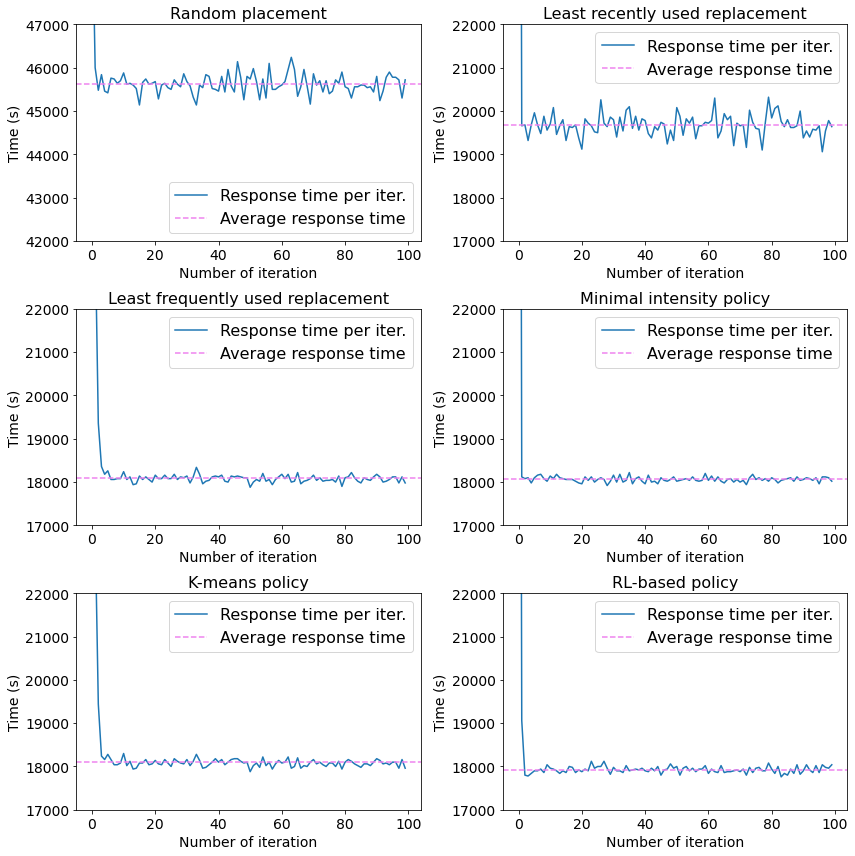

In [178]:
plt.figure(figsize=(12,12))

plt.subplot(3,2,6)
plt.plot([i for i in tiA_rl])
plt.axhline(sum([i for i in tiA_rl[2:]])/98,linestyle='--',color='violet')
plt.ylabel('Time (s)',fontsize=14)
plt.xlabel('Number of iteration',fontsize=14)
plt.ylim(17000,22000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.yticks([15,7750,sum(tiA),8250,8500,8750,9000,9250,9500])
plt.legend(['Response time per iter.','Average response time'],fontsize=16)
plt.title('RL-based policy',fontsize=16)

plt.subplot(3,2,5)
plt.plot([i for i in tiA_kmeans])
plt.axhline(sum([i for i in tiA_kmeans[2:]])/98,linestyle='--',color='violet')
plt.ylabel('Time (s)',fontsize=14)
plt.xlabel('Number of iteration',fontsize=14)
plt.ylim(17000,22000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.yticks([15,7750,sum(tiA),8250,8500,8750,9000,9250,9500])
plt.legend(['Response time per iter.','Average response time'],fontsize=16)
plt.title('K-means policy',fontsize=16)

plt.subplot(3,2,1)
plt.plot([i for i in tiA_rd1])
plt.axhline(sum([i for i in tiA_rd1[2:]])/98,linestyle='--',color='violet')
plt.ylabel('Time (s)',fontsize=14)
plt.xlabel('Number of iteration',fontsize=14)
plt.ylim(42000,47000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.yticks([15,7750,sum(tiA),8250,8500,8750,9000,9250,9500])
plt.legend(['Response time per iter.','Average response time'],loc='lower right',fontsize=16)
plt.title('Random placement',fontsize=16)

plt.subplot(3,2,2)
plt.plot([i for i in tiA_lru])
plt.axhline(sum([i for i in tiA_lru[2:]])/98,linestyle='--',color='violet')
plt.ylabel('Time (s)',fontsize=14)
plt.xlabel('Number of iteration',fontsize=14)
plt.ylim(17000,22000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.yticks([15,7750,sum(tiA),8250,8500,8750,9000,9250,9500])
plt.legend(['Response time per iter.','Average response time'],fontsize=16)
plt.title('Least recently used replacement',fontsize=16)

plt.subplot(3,2,3)
plt.plot([i for i in tiA_lfu])
plt.axhline(sum([i for i in tiA_lfu[2:]])/98,linestyle='--',color='violet')
plt.ylabel('Time (s)',fontsize=14)
plt.xlabel('Number of iteration',fontsize=14)
plt.ylim(17000,22000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.yticks([15,7750,sum(tiA),8250,8500,8750,9000,9250,9500])
plt.legend(['Response time per iter.','Average response time'],loc='upper right',fontsize=16)
plt.title('Least frequently used replacement',fontsize=16)

plt.subplot(3,2,4)
plt.plot([i for i in tiA_mi])
plt.axhline(sum([i for i in tiA_mi[2:]])/98,linestyle='--',color='violet')
plt.ylabel('Time (s)',fontsize=14)
plt.xlabel('Number of iteration',fontsize=14)
plt.ylim(17000,22000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.yticks([15,7750,sum(tiA),8250,8500,8750,9000,9250,9500])
plt.legend(['Response time per iter.','Average response time'],fontsize=16)
plt.title('Minimal intensity policy',fontsize=16)

plt.tight_layout()
plt.savefig('./Running_time_sarscov_RL-Rd-lru-lfu-Minints-1.png',format='png',dpi=320, bbox_inches='tight')
plt.show()

In [155]:
[sum([i for i in tiA_rd1[2:]])/98,
 sum([i for i in tiA_lru[2:]])/98,
 sum([i for i in tiA_lfu[2:]])/98,
 sum([i for i in tiA_mi[2:]])/98,
 sum([i for i in tiA_kmeans[2:]])/98,
 sum([i for i in tiA_rl[2:]])/98]

[45620.61224489796,
 19670.61224489796,
 18096.938775510203,
 18062.448979591838,
 18096.326530612245,
 17924.897959183672]

# Batch A+B

In [134]:
COVID_BatchA=pd.read_csv('./Covid_dataset/COVID_BatchA.csv')
COVID_BatchB=pd.read_csv('./Covid_dataset/COVID_BatchB.csv',sep=';')

In [135]:
COVID_BatchB

,PlateWellCompound,Count_nuclei,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,AreaShape_Center_Y_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_8_8_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm,CompoundID,principal component 1,Ypredicted,Intensity_MeanIntensity_illumMITO_cells.1
0,001BA24Uninfected,145.111111,2043.671887,2681.729275,1142.784807,1112.737681,1091.601764,1061.287377,1116.719842,1086.485031,...,-0.025645,-0.008119,-0.015380,0.015632,0.011816,0.118012,Uninfected,-79.620532,0.976469,0.006588
1,001BB24Uninfected,125.222222,2027.864860,2672.871742,1058.172421,1111.932891,1006.943735,1060.680468,1032.068745,1085.820435,...,-0.053949,0.021601,-0.013214,0.004970,0.045479,-0.078293,Uninfected,-79.055336,0.978149,0.006484
2,001BC24Uninfected,145.111111,2014.114085,2648.770500,1103.576794,1193.918278,1052.593170,1142.957278,1077.612931,1167.955982,...,0.030906,0.008613,-0.031233,-0.010324,0.039864,-0.000464,Uninfected,-73.263355,0.899611,0.008457
3,001BD24Uninfected,128.111111,2052.138615,2683.004331,1147.180633,1059.077917,1095.925975,1007.766947,1121.060438,1032.936692,...,-0.030598,-0.060260,-0.049532,-0.072503,-0.052095,0.064395,Uninfected,-82.690780,1.009812,0.006422
4,001BE24Uninfected,136.888889,2049.408789,2689.330312,1045.287663,1125.687319,993.745415,1074.362034,1019.010147,1099.546187,...,0.028126,0.039572,0.077121,-0.044403,0.025871,-0.058419,Uninfected,-79.777383,0.976496,0.007382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6041,009BB20CBK000164,180.222222,1690.939344,2293.675763,1138.220412,1148.935827,1091.302062,1101.648555,1114.276267,1124.804167,...,0.019775,0.064071,0.024851,0.098632,-0.051612,-0.035489,CBK000164,4.378256,0.073500,0.013315
6042,013BM21CBK000162,171.444444,1677.508782,2282.699827,1082.553287,1220.024137,1035.514778,1173.083796,1058.527221,1196.025812,...,0.054742,0.010871,0.036485,0.072577,-0.028736,-0.072115,CBK000162,15.895117,-0.039822,0.015745
6043,003BH17CBK000161,195.000000,1758.366085,2367.640809,1116.504274,1064.407806,1068.684267,1016.340580,1092.103425,1039.853249,...,-0.048759,0.084703,0.087592,-0.007032,-0.072086,0.088548,CBK000161,-10.568905,0.228869,0.013105
6044,001BO03CBK000156,205.111111,1826.912007,2470.646705,1180.893197,1110.601453,1132.336694,1061.711624,1156.088388,1085.632521,...,-0.077794,-0.065910,-0.034401,-0.005483,-0.020223,-0.057537,CBK000156,8.663122,0.038287,0.013150


In [240]:
COVID_BatchB.loc[COVID_BatchB['Intensity_MeanIntensity_illumMITO_cells.1']<0.0083]

,PlateWellCompound,Count_nuclei,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,AreaShape_Center_Y_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_8_8_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm,CompoundID,principal component 1,Ypredicted,Intensity_MeanIntensity_illumMITO_cells.1
0,001BA24Uninfected,145.111111,2043.671887,2681.729275,1142.784807,1112.737681,1091.601764,1061.287377,1116.719842,1086.485031,...,-0.025645,-0.008119,-0.015380,0.015632,0.011816,0.118012,Uninfected,-79.620532,0.976469,0.006588
1,001BB24Uninfected,125.222222,2027.864860,2672.871742,1058.172421,1111.932891,1006.943735,1060.680468,1032.068745,1085.820435,...,-0.053949,0.021601,-0.013214,0.004970,0.045479,-0.078293,Uninfected,-79.055336,0.978149,0.006484
3,001BD24Uninfected,128.111111,2052.138615,2683.004331,1147.180633,1059.077917,1095.925975,1007.766947,1121.060438,1032.936692,...,-0.030598,-0.060260,-0.049532,-0.072503,-0.052095,0.064395,Uninfected,-82.690780,1.009812,0.006422
4,001BE24Uninfected,136.888889,2049.408789,2689.330312,1045.287663,1125.687319,993.745415,1074.362034,1019.010147,1099.546187,...,0.028126,0.039572,0.077121,-0.044403,0.025871,-0.058419,Uninfected,-79.777383,0.976496,0.007382
5,001BF24Uninfected,109.888889,2070.625781,2727.088314,1069.563705,1115.529441,1017.845963,1063.980434,1043.220697,1089.213908,...,0.061149,0.039928,-0.017042,-0.066035,-0.137384,-0.100169,Uninfected,-74.785085,0.929794,0.006718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,001BO19CBK041857,179.000000,1912.388725,2527.247871,1122.928346,1098.519175,1073.420524,1048.731034,1097.699119,1073.147481,...,0.070771,0.017755,-0.047012,-0.060169,0.067531,-0.063272,CBK041857,-56.092735,0.721245,0.007450
5239,001BC03CBK041550,212.222222,1890.310732,2504.069498,1112.560233,1162.085046,1063.104284,1112.443381,1087.328444,1136.726010,...,0.071270,0.007834,0.003938,0.025694,0.049991,0.014033,CBK041550,-49.938064,0.655246,0.007834
5396,016BC18CBK041256,251.666667,1937.202652,2558.045214,1112.524786,1097.124950,1062.397271,1047.013154,1086.961393,1071.561143,...,0.052687,0.020374,-0.003629,-0.077593,0.016231,0.002078,CBK041256,-67.074289,0.843227,0.008003
5567,006BE21CBK041013,208.500000,1934.675213,2547.825307,1105.638880,1157.533256,1056.098619,1107.059681,1080.353950,1131.784809,...,0.025498,-0.029253,-0.051361,-0.000673,-0.024417,0.013625,CBK041013,-65.659605,0.821766,0.008188


In [509]:
COVID_BatchB.loc[COVID_BatchB['Intensity_MeanIntensity_illumMITO_cells.1']<0.0068]

,PlateWellCompound,Count_nuclei,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,AreaShape_Center_Y_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_8_8_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm,CompoundID,principal component 1,Ypredicted,Intensity_MeanIntensity_illumMITO_cells.1
0,001BA24Uninfected,145.111111,2043.671887,2681.729275,1142.784807,1112.737681,1091.601764,1061.287377,1116.719842,1086.485031,...,-0.025645,-0.008119,-0.015380,0.015632,0.011816,0.118012,Uninfected,-79.620532,0.976469,0.006588
1,001BB24Uninfected,125.222222,2027.864860,2672.871742,1058.172421,1111.932891,1006.943735,1060.680468,1032.068745,1085.820435,...,-0.053949,0.021601,-0.013214,0.004970,0.045479,-0.078293,Uninfected,-79.055336,0.978149,0.006484
3,001BD24Uninfected,128.111111,2052.138615,2683.004331,1147.180633,1059.077917,1095.925975,1007.766947,1121.060438,1032.936692,...,-0.030598,-0.060260,-0.049532,-0.072503,-0.052095,0.064395,Uninfected,-82.690780,1.009812,0.006422
5,001BF24Uninfected,109.888889,2070.625781,2727.088314,1069.563705,1115.529441,1017.845963,1063.980434,1043.220697,1089.213908,...,0.061149,0.039928,-0.017042,-0.066035,-0.137384,-0.100169,Uninfected,-74.785085,0.929794,0.006718
6,001BG24Uninfected,117.000000,2015.534618,2652.125715,1019.629302,1173.851133,968.548638,1122.659114,993.591930,1147.743986,...,0.018943,0.080183,-0.005402,0.024559,-0.024266,0.007101,Uninfected,-78.701328,0.975126,0.006313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,015BI24Uninfected,137.666667,1989.087472,2615.157752,1116.841247,1119.273707,1066.172245,1068.602999,1091.019389,1093.448344,...,0.016974,-0.004061,0.064307,-0.016573,-0.059754,-0.050814,Uninfected,-81.978486,0.999963,0.006386
238,015BP24Uninfected,177.500000,2101.419120,2760.487341,1026.074587,1205.099390,974.128489,1153.061103,999.580022,1178.640350,...,0.036027,-0.082088,-0.031090,0.075817,0.038622,-0.060076,Uninfected,-79.910528,0.994249,0.006669
247,016BI24Uninfected,231.444444,1996.001742,2616.701514,1078.096428,1113.759012,1027.328378,1063.212231,1052.206026,1087.985409,...,0.030397,-0.002988,-0.005862,0.058374,-0.005225,-0.001539,Uninfected,-72.530667,0.903862,0.006788
250,016BL24Uninfected,266.571429,2042.428886,2669.376610,1071.529448,1248.093520,1020.432270,1196.860998,1045.481214,1222.014209,...,0.078616,-0.027128,0.090409,0.032623,0.121420,0.062419,Uninfected,-64.301903,0.838934,0.006680


In [168]:
COVID_BatchB['principal component 1'].describe()

count    6046.000000
mean       -0.026245
std        26.562275
min       -92.890042
25%        -9.339541
50%         3.807446
75%        15.843949
max        78.510751
Name: principal component 1, dtype: float64

In [136]:
all_A=pd.DataFrame()
all_A['No.']=range(len(COVID_BatchA))
all_A['Batch']='A'
all_A['ints']=COVID_BatchA['Intensity_MeanIntensity_illumMITO_cells.1']
all_A['req_time']=0
all_A['time_untouched']=0
all_A['weight']=COVID_BatchA['principal component 1']+100
all_A['temp']=0.5
all_A['size']=89
all_A['time_touched']=0

all_B=pd.DataFrame()
all_B['No.']=range(len(COVID_BatchB))
all_B['Batch']='B'
all_B['ints']=COVID_BatchB['Intensity_MeanIntensity_illumMITO_cells.1']
all_B['req_time']=0
all_B['time_untouched']=0
all_B['weight']=COVID_BatchB['principal component 1']+100
all_B['temp']=0.5
all_B['size']=89
all_B['time_touched']=0

all_tier=pd.concat([all_A,all_B],ignore_index=True)
all_tier['No.']=range(len(all_tier))
all_tier['ratio']=0
all_tier=all_tier.sample(frac=1)
all_tier

,No.,Batch,ints,req_time,time_untouched,weight,temp,size,time_touched,ratio
117,117,A,0.010869,0,0,120.535056,0.5,89,0,0
9918,9918,B,0.017825,0,0,137.032658,0.5,89,0,0
8824,8824,B,0.013173,0,0,82.955733,0.5,89,0,0
9959,9959,B,0.012109,0,0,132.097093,0.5,89,0,0
1547,1547,A,0.006631,0,0,41.247002,0.5,89,0,0
...,...,...,...,...,...,...,...,...,...,...
5243,5243,B,0.007372,0,0,17.775938,0.5,89,0,0
2248,2248,A,0.009811,0,0,93.297244,0.5,89,0,0
2503,2503,A,0.009917,0,0,128.586530,0.5,89,0,0
6400,6400,B,0.014440,0,0,97.294250,0.5,89,0,0


In [580]:
(0.01-0.0083)/0.00005

34.0

In [596]:
all_tier.loc[all_tier['ints']<0.01]

,No.,Batch,ints,req_time,time_untouched,weight,temp,size,time_touched,ratio
0,0,A,0.008777,0,0,81.631092,0.5,500,0,0
1,1,A,0.008477,0,0,78.131109,0.5,500,0,0
2,2,A,0.008487,0,0,81.519365,0.5,500,0,0
3,3,A,0.005784,0,0,28.751494,0.5,500,0,0
4,4,A,0.008265,0,0,82.165616,0.5,500,0,0
...,...,...,...,...,...,...,...,...,...,...
10714,10714,B,0.008370,0,0,42.167624,0.5,500,0,0
10743,10743,B,0.008188,0,0,34.340395,0.5,500,0,1
10830,10830,B,0.007959,0,0,37.666457,0.5,500,0,1
10890,10890,B,0.008869,0,0,48.349694,0.5,500,0,0


In [589]:
all_tier.loc[all_tier['No.'].isin(all_tier.loc[(all_tier['ints']<0.0083) & (all_tier['Batch']=='B')]['No.'])]

,No.,Batch,ints,req_time,time_untouched,weight,temp,size,time_touched,ratio
5176,5176,B,0.006588,0,0,20.379468,0.5,500,0,1
5177,5177,B,0.006484,0,0,20.944664,0.5,500,0,1
5179,5179,B,0.006422,0,0,17.309220,0.5,500,0,1
5180,5180,B,0.007382,0,0,20.222617,0.5,500,0,1
5181,5181,B,0.006718,0,0,25.214915,0.5,500,0,1
...,...,...,...,...,...,...,...,...,...,...
10221,10221,B,0.007450,0,0,43.907265,0.5,500,0,1
10415,10415,B,0.007834,0,0,50.061936,0.5,500,0,1
10572,10572,B,0.008003,0,0,32.925711,0.5,500,0,1
10743,10743,B,0.008188,0,0,34.340395,0.5,500,0,1


In [655]:
for turn in range(200):
    cprint('%dth turn'%turn, 'green')
    ## read requests
    Request=pd.read_csv('./Covid_dataset/Requests_A+B_1000/req_%d.csv'%turn)
    print(len(Request.loc[Request['request']==1]))

0th turn
1529
1th turn
1497
2th turn
1455
3th turn
1420
4th turn
1388
5th turn
1357
6th turn
1323
7th turn
1286
8th turn
1264
9th turn
1233
10th turn
1203
11th turn
1179
12th turn
1149
13th turn
1125
14th turn
1104
15th turn
1087
16th turn
1056
17th turn
1028
18th turn
1008
19th turn
988
20th turn
961
21th turn
930
22th turn
907
23th turn
886
24th turn
865
25th turn
846
26th turn
831
27th turn
817
28th turn
798
29th turn
779
30th turn
769
31th turn
755
32th turn
734
33th turn
723
34th turn
695
35th turn
682
36th turn
300
37th turn
300
38th turn
300
39th turn
300
40th turn
300
41th turn
300
42th turn
300
43th turn
300
44th turn
300
45th turn
300
46th turn
300
47th turn
300
48th turn
300
49th turn
300
50th turn
300
51th turn
300
52th turn
300
53th turn
300
54th turn
300
55th turn
300
56th turn
300
57th turn
300
58th turn
300
59th turn
300
60th turn
300
61th turn
300
62th turn
300
63th turn
300
64th turn
300
65th turn
300
66th turn
300
67th turn
300
68th turn
300
69th turn
300
70th turn
3

## File distributions

In [189]:
Tier_list_RL=np.load('./Covid_dataset/Tier_list_RL_A+B_temp_200.npy',allow_pickle=True)
tier3=pd.DataFrame(Tier_list_RL[199][2],columns=['No.','Batch','ints','req_time','time_untouched','weight','temp','size','time_touched','ratio'])
tier2=pd.DataFrame(Tier_list_RL[199][1],columns=['No.','Batch','ints','req_time','time_untouched','weight','temp','size','time_touched','ratio'])
tier1=pd.DataFrame(Tier_list_RL[199][0],columns=['No.','Batch','ints','req_time','time_untouched','weight','temp','size','time_touched','ratio'])
tier3['No.']=tier3['No.'].astype('int')
tier2['No.']=tier2['No.'].astype('int')
tier1['No.']=tier1['No.'].astype('int')
tier2

,No.,Batch,ints,req_time,time_untouched,weight,temp,size,time_touched,ratio
0,4088,A,0.00893268,4,196,107.832,0.1,89,4,6.83979e-07
1,3492,A,0.00893796,4,196,126.342,0.1,89,4,6.8397e-07
2,1607,A,0.00892148,4,196,82.6839,0.1,89,4,6.83997e-07
3,1157,A,0.00892468,4,196,106.048,0.1,89,4,6.83992e-07
4,2320,A,0.00893477,4,196,105.277,0.1,89,4,6.83975e-07
...,...,...,...,...,...,...,...,...,...,...
1145,5587,B,0.0081445,172,0,50.3608,0.983968,89,172,0.000662314
1146,5234,B,0.0071419,172,0,16.4513,0.983968,89,172,0.000496838
1147,5252,B,0.0068629,172,1,17.747,0.983968,89,172,0.000483746
1148,5199,B,0.0065481,172,0,18.7892,0.983968,89,172,0.000494908


## Time/request

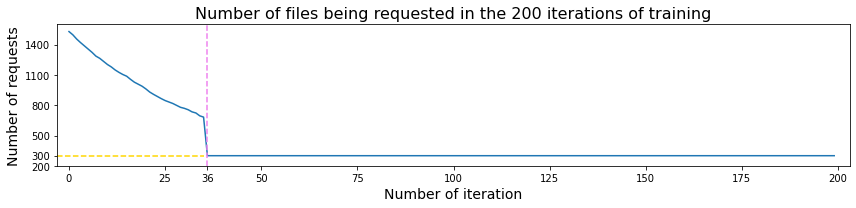

In [177]:
num_req=[]
for turn in range(200):
    req=pd.read_csv('./Covid_dataset/Requests_A+B_1000/req_%d.csv'%turn)
    num=len(req.loc[req['request']==1])
    num_req.append(num)
plt.figure(figsize=(12,3))
plt.plot(num_req)
plt.axvline(x=36,linestyle='--',color='violet')
plt.axhline(y=300,xmin=0,xmax=37/200,linestyle='--',color='gold')
plt.xlim(-3,203)
plt.ylim(200,1600)
plt.xticks([0,25,36,50,75,100,125,150,175,200])
plt.yticks([200,300,500,800,1100,1400])
plt.xlabel('Number of iteration',fontsize=14)
plt.ylabel('Number of requests',fontsize=14)
plt.title('Number of files being requested in the 200 iterations of training',fontsize=16)
plt.tight_layout()
plt.savefig('./Number_req_A+B_sarcovs.png',format='png',dpi=320, bbox_inches='tight')
plt.show()

## RL policy

In [141]:
ti_rl=[]
Tier_list_RL=np.load('./Covid_dataset/Tier_list_RL_TD0_A+B_temp_200.npy',allow_pickle=True)
for turn in range(200):
    req=pd.read_csv('./Covid_dataset/Requests_A+B_1000/req_%d.csv'%turn)
    req=req.loc[req['request']==1]
    tier3=pd.DataFrame(Tier_list_RL[turn][2],columns=['No.','Batch','ints','req_time','time_untouched','weight','temp','size','time_touched','ratio'])
    tier2=pd.DataFrame(Tier_list_RL[turn][1],columns=['No.','Batch','ints','req_time','time_untouched','weight','temp','size','time_touched','ratio'])
    tier1=pd.DataFrame(Tier_list_RL[turn][0],columns=['No.','Batch','ints','req_time','time_untouched','weight','temp','size','time_touched','ratio'])
    tier3['No.']=tier3['No.'].astype('int')
    tier2['No.']=tier2['No.'].astype('int')
    tier1['No.']=tier1['No.'].astype('int')
    ti=0
    for no in req['No.']:
        if no in list(tier3['No.']):
            ti+=20
        elif no in list(tier2['No.']):
            ti+=40
        elif no in list(tier1['No.']):
            ti+=100
        else:
            print('Error: no such file in tier3/2/1')
    ti_rl.append(ti)

In [142]:
ti_rl

[83900,
 62300,
 58100,
 54600,
 51400,
 49680,
 48320,
 46840,
 45960,
 44720,
 43520,
 42560,
 41360,
 40400,
 39560,
 38880,
 37640,
 36520,
 35720,
 34920,
 33840,
 32600,
 31680,
 30840,
 30000,
 29240,
 28640,
 28080,
 27320,
 26560,
 26160,
 25600,
 24760,
 24320,
 23200,
 22680,
 7400,
 8100,
 8260,
 8180,
 8100,
 8200,
 8140,
 8160,
 8140,
 8280,
 8180,
 8100,
 8260,
 8080,
 8240,
 8060,
 8140,
 8220,
 8080,
 8280,
 8120,
 8140,
 8280,
 8080,
 8300,
 8200,
 8080,
 8160,
 8200,
 8120,
 8220,
 8260,
 8220,
 8160,
 8140,
 8200,
 8240,
 8140,
 8140,
 8240,
 8200,
 8120,
 8180,
 8160,
 8180,
 8000,
 8100,
 8100,
 8260,
 8240,
 8040,
 8180,
 8160,
 8180,
 8160,
 8080,
 8140,
 8160,
 8200,
 8140,
 8160,
 8140,
 8140,
 8120,
 8220,
 8080,
 8140,
 8100,
 8160,
 8180,
 8200,
 8160,
 8120,
 8200,
 8060,
 8200,
 8080,
 8200,
 8120,
 8180,
 8100,
 8220,
 8160,
 8100,
 8140,
 8120,
 8120,
 8120,
 8120,
 8260,
 8100,
 8160,
 8220,
 8060,
 8140,
 8120,
 8120,
 8100,
 8140,
 8120,
 7980,
 8100

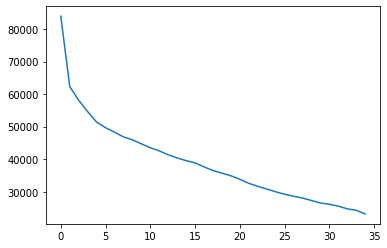

In [12]:
plt.plot(ti_rl[0:35])
#plt.ylim(10000,15000)
#plt.axhline(y=sum(ti_rl)/200,linestyle='--',color='violet')

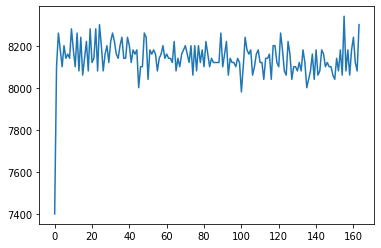

In [81]:
plt.plot(ti_rl[36:])

## Random

In [93]:
len(tier3),len(tier2)

(230, 1150)

In [144]:
ti_rd1=[]
all_tier=pd.concat([tier1,tier2,tier3],ignore_index=True)
all_tier=all_tier.sample(frac=1)
tier3=all_tier[0:230]
tier2=all_tier[230:1380]
tier1=all_tier[1380:]
for turn in range(200):
    req=pd.read_csv('./Covid_dataset/Requests_A+B_1000/req_%d.csv'%turn)
    req=req.loc[req['request']==1]
    ti=0
    for no in req['No.']:
        if no in list(tier3['No.']):
            ti+=20
        elif no in list(tier2['No.']):
            ti+=40
        elif no in list(tier1['No.']):
            ti+=100
        else:
            print('Error: no such file in tier3/2/1')
    ti_rd1.append(ti)
    
ti_rd2=[]
all_tier=pd.concat([tier1,tier2,tier3],ignore_index=True)
all_tier=all_tier.sample(frac=1)
tier3=all_tier[0:230]
tier2=all_tier[230:1380]
tier1=all_tier[1380:]
for turn in range(200):
    req=pd.read_csv('./Covid_dataset/Requests_A+B_1000/req_%d.csv'%turn)
    req=req.loc[req['request']==1]
    ti=0
    for no in req['No.']:
        if no in list(tier3['No.']):
            ti+=20
        elif no in list(tier2['No.']):
            ti+=40
        elif no in list(tier1['No.']):
            ti+=100
        else:
            print('Error: no such file in tier3/2/1')
    ti_rd2.append(ti)


In [145]:
ti_rd1

[140580,
 137820,
 133960,
 130580,
 127600,
 124640,
 121620,
 118240,
 116380,
 113480,
 110720,
 108560,
 105760,
 103620,
 101660,
 100020,
 97140,
 94760,
 92940,
 91120,
 88560,
 85740,
 83520,
 81540,
 79500,
 77860,
 76540,
 75200,
 73560,
 71780,
 70840,
 69440,
 67640,
 66600,
 64040,
 62800,
 27740,
 27600,
 27860,
 27960,
 27800,
 27920,
 27940,
 28060,
 27780,
 27720,
 27700,
 27940,
 28080,
 27860,
 28080,
 27780,
 27860,
 27860,
 27920,
 28140,
 27820,
 27760,
 27900,
 27700,
 27980,
 27920,
 27880,
 27840,
 27780,
 28000,
 27720,
 28060,
 27840,
 28080,
 27920,
 27800,
 27900,
 28120,
 28080,
 27800,
 27780,
 27780,
 28060,
 27860,
 27860,
 27800,
 27840,
 28120,
 28000,
 27960,
 27920,
 27820,
 27760,
 28040,
 27720,
 27700,
 27620,
 28020,
 28040,
 27660,
 27740,
 28040,
 28220,
 27760,
 27660,
 27760,
 27900,
 27980,
 28060,
 28100,
 27860,
 28100,
 27860,
 28140,
 27920,
 27980,
 28080,
 27800,
 27640,
 27880,
 28180,
 28140,
 27540,
 27860,
 28020,
 27780,
 28160,


## LRU

In [146]:
ti_lru=[]
tier3=all_tier[0:0]
tier2=all_tier[0:0]
tier1=all_tier[0:]
for turn in range(200):
    req=pd.read_csv('./Covid_dataset/Requests_A+B_1000/req_%d.csv'%turn)
    req_1=req.loc[req['request']==1]
    ti=0
    for no in req_1['No.']:
        if no in list(tier3['No.']):
            ti+=20
        elif no in list(tier2['No.']):
            ti+=40
        elif no in list(tier1['No.']):
            ti+=100
        else:
            print('Error: no such file in tier3/2/1')
    ti_lru.append(ti)
    tier=pd.concat([all_tier.loc[all_tier['No.'].isin(req_1['No.'])],all_tier.loc[~all_tier['No.'].isin(req_1['No.'])]],ignore_index=True)
    tier3=tier[0:230]
    tier2=tier[230:1380]
    tier1=tier[1380:]

## LFU

In [148]:
ti_lfu=[]
all_tier_f=all_tier
all_tier_f['freq']=0
tier3=all_tier_f[0:0]
tier2=all_tier_f[0:0]
tier1=all_tier_f[0:]
for turn in range(200):
    req=pd.read_csv('./Covid_dataset/Requests_A+B_1000/req_%d.csv'%turn)
    req_1=req.loc[req['request']==1]
    all_tier_f.loc[all_tier_f['No.'].isin(req_1['No.']),'freq']+=1
    ti=0
    for no in req_1['No.']:
        if no in list(tier3['No.']):
            ti+=20
        elif no in list(tier2['No.']):
            ti+=40
        elif no in list(tier1['No.']):
            ti+=100
        else:
            print('Error: no such file in tier3/2/1')
    ti_lfu.append(ti)
    tier3=all_tier_f.sort_values(by='freq',ascending=False)[0:230]
    tier2=all_tier_f.sort_values(by='freq',ascending=False)[230:1380]
    tier1=all_tier_f.sort_values(by='freq',ascending=False)[1380:]

## K-means

In [151]:
ti_kmeans=[]
all_tier_f=all_tier
all_tier_f['freq']=0
tier3=all_tier_f[0:0]
tier2=all_tier_f[0:0]
tier1=all_tier_f[0:]
for turn in range(200):
    req=pd.read_csv('./Covid_dataset/Requests_A+B_1000/req_%d.csv'%turn)
    req_1=req.loc[req['request']==1]
    all_tier_f.loc[all_tier_f['No.'].isin(req_1['No.']),'freq']+=1
    ti=0
    for no in req_1['No.']:
        if no in list(tier3['No.']):
            ti+=20
        elif no in list(tier2['No.']):
            ti+=40
        elif no in list(tier1['No.']):
            ti+=100
        else:
            print('Error: no such file in tier3/2/1')
    ti_kmeans.append(ti)
    all_tier_f['label']=KMeans(n_clusters=100, random_state=0, n_init=10).fit(all_tier_f[['freq','ints','weight']]).labels_    
    tier=all_tier_f.sort_values(by=['freq','label'],ascending=False)
    tier3=tier[0:230]
    tier2=tier[230:1380]
    tier1=tier[1380:]

## Min-ints

In [150]:
ti_miA=[]
tier3=all_tier.sort_values(by='ints')[0:230]
tier2=all_tier.sort_values(by='ints')[230:1380]
tier1=all_tier.sort_values(by='ints')[1380:]
for turn in range(200):
    req=pd.read_csv('./Covid_dataset/Requests_A+B_1000/req_%d.csv'%turn)
    req=req.loc[req['request']==1]
    ti=0
    for no in req['No.']:
        if no in list(tier3['No.']):
            ti+=20
        elif no in list(tier2['No.']):
            ti+=40
        elif no in list(tier1['No.']):
            ti+=100
        else:
            print('Error: no such file in tier3/2/1')
    ti_miA.append(ti)

## Joint plot

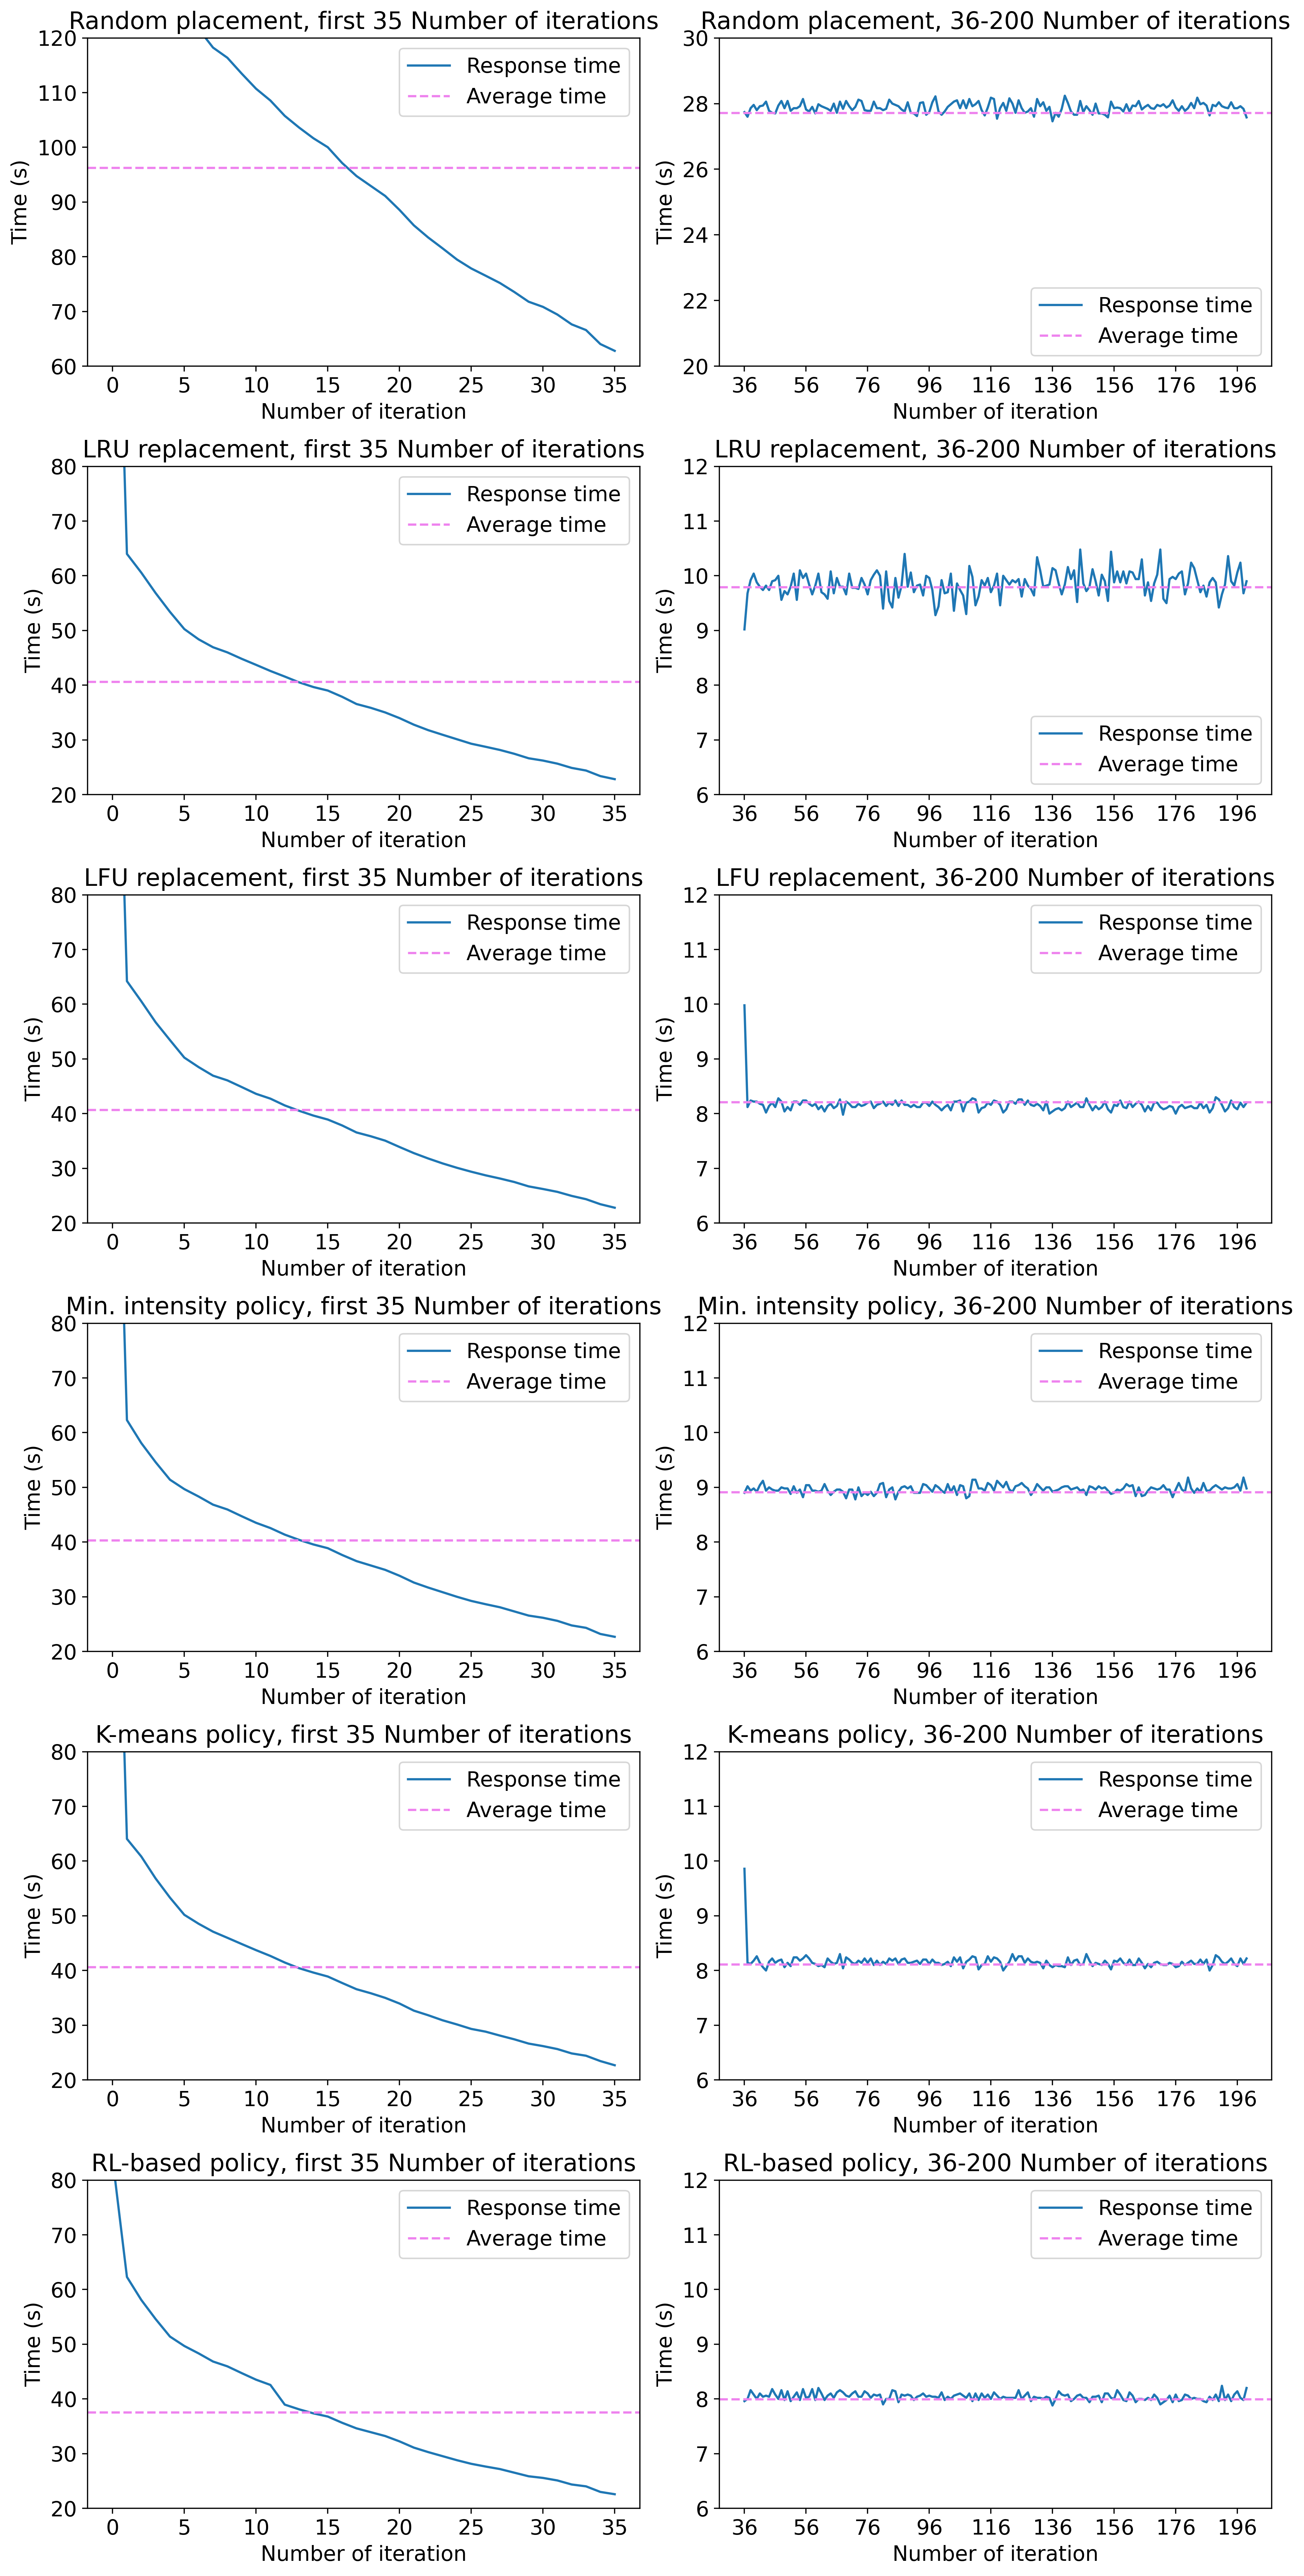

In [160]:
plt.figure(1,figsize=(12,24), dpi=320)


plt.subplot(6,2,11)
plt.plot([i/1000 for i in ti_rl[0:36]])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(20,80)
plt.axhline(y=sum([i/1000 for i in ti_rl[0:36]])/36,linestyle='--',color='violet')#,label='_nolegend_')
plt.xlabel('Number of iteration',fontsize=14)
plt.ylabel('Time (s)',fontsize=14)
plt.legend(['Response time','Average time'],fontsize=14)
plt.title('RL-based policy, first 35 Number of iterations',fontsize=16)

plt.subplot(6,2,12)
plt.plot([i/1000 for i in ti_rl[36:]])
plt.xticks(np.arange(0,166,step=20),np.arange(36,201,step=20), fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(6,12)
plt.axhline(y=sum([i/1000 for i in ti_rl[36:]])/165,linestyle='--',color='violet')#,label='_nolegend_')
plt.xlabel('Number of iteration',fontsize=14)
plt.ylabel('Time (s)',fontsize=14)
plt.legend(['Response time','Average time'],fontsize=14)
plt.title('RL-based policy, 36-200 Number of iterations',fontsize=16)

plt.subplot(6,2,1)
plt.plot([i/1000 for i in ti_rd1[0:36]])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(60,120)
plt.axhline(y=sum([i/1000 for i in ti_rd1[0:36]])/36,linestyle='--',color='violet')#,label='_nolegend_')
plt.xlabel('Number of iteration',fontsize=14)
plt.ylabel('Time (s)',fontsize=14)
plt.legend(['Response time','Average time'],fontsize=14)
plt.title('Random placement, first 35 Number of iterations',fontsize=16)

plt.subplot(6,2,2)
plt.plot([i/1000 for i in ti_rd1[36:]])
plt.xticks(np.arange(0,166,step=20),np.arange(36,201,step=20), fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(20,30)
plt.axhline(y=sum([i/1000 for i in ti_rd1[36:]])/165,linestyle='--',color='violet')#,label='_nolegend_')
plt.xlabel('Number of iteration',fontsize=14)
plt.ylabel('Time (s)',fontsize=14)
plt.legend(['Response time','Average time'],loc='lower right',fontsize=14)
plt.title('Random placement, 36-200 Number of iterations',fontsize=16)

plt.subplot(6,2,3)
plt.plot([i/1000 for i in ti_lru[0:36]])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(20,80)
plt.axhline(y=sum([i/1000 for i in ti_lru[0:36]])/36,linestyle='--',color='violet')#,label='_nolegend_')
plt.xlabel('Number of iteration',fontsize=14)
plt.ylabel('Time (s)',fontsize=14)
plt.legend(['Response time','Average time'],fontsize=14)
plt.title('LRU replacement, first 35 Number of iterations',fontsize=16)

plt.subplot(6,2,4)
plt.plot([i/1000 for i in ti_lru[36:]])
plt.xticks(np.arange(0,166,step=20),np.arange(36,201,step=20), fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(6,12)
plt.axhline(y=sum([i/1000 for i in ti_lru[36:]])/165,linestyle='--',color='violet')#,label='_nolegend_')
plt.xlabel('Number of iteration',fontsize=14)
plt.ylabel('Time (s)',fontsize=14)
plt.legend(['Response time','Average time'],loc='lower right',fontsize=14)
plt.title('LRU replacement, 36-200 Number of iterations',fontsize=16)

plt.subplot(6,2,5)
plt.plot([i/1000 for i in ti_lfu[0:36]])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(20,80)
plt.axhline(y=sum([i/1000 for i in ti_lfu[0:36]])/36,linestyle='--',color='violet')#,label='_nolegend_')
plt.xlabel('Number of iteration',fontsize=14)
plt.ylabel('Time (s)',fontsize=14)
plt.legend(['Response time','Average time'],fontsize=14)
plt.title('LFU replacement, first 35 Number of iterations',fontsize=16)

plt.subplot(6,2,6)
plt.plot([i/1000 for i in ti_lfu[36:]])
plt.xticks(np.arange(0,166,step=20),np.arange(36,201,step=20), fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(6,12)
plt.axhline(y=sum([i/1000 for i in ti_lfu[36:]])/165,linestyle='--',color='violet')#,label='_nolegend_')
plt.xlabel('Number of iteration',fontsize=14)
plt.ylabel('Time (s)',fontsize=14)
plt.legend(['Response time','Average time'],fontsize=14)
plt.title('LFU replacement, 36-200 Number of iterations',fontsize=16)

plt.subplot(6,2,7)
plt.plot([i/1000 for i in ti_miA[0:36]])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(20,80)
plt.axhline(y=sum([i/1000 for i in ti_miA[0:36]])/36,linestyle='--',color='violet')#,label='_nolegend_')
plt.xlabel('Number of iteration',fontsize=14)
plt.ylabel('Time (s)',fontsize=14)
plt.legend(['Response time','Average time'],fontsize=14)
plt.title('Min. intensity policy, first 35 Number of iterations',fontsize=16)

plt.subplot(6,2,8)
plt.plot([i/1000 for i in ti_miA[36:]])
plt.xticks(np.arange(0,166,step=20),np.arange(36,201,step=20), fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(6,12)
plt.axhline(y=sum([i/1000 for i in ti_miA[36:]])/165,linestyle='--',color='violet')#,label='_nolegend_')
plt.xlabel('Number of iteration',fontsize=14)
plt.ylabel('Time (s)',fontsize=14)
plt.legend(['Response time','Average time'],fontsize=14)
plt.title('Min. intensity policy, 36-200 Number of iterations',fontsize=16)

plt.subplot(6,2,9)
plt.plot([i/1000 for i in ti_kmeans[0:36]])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(20,80)
plt.axhline(y=sum([i/1000 for i in ti_kmeans[0:36]])/36,linestyle='--',color='violet')#,label='_nolegend_')
plt.xlabel('Number of iteration',fontsize=14)
plt.ylabel('Time (s)',fontsize=14)
plt.legend(['Response time','Average time'],fontsize=14)
plt.title('K-means policy, first 35 Number of iterations',fontsize=16)

plt.subplot(6,2,10)
plt.plot([i/1000 for i in ti_kmeans[36:]])
plt.xticks(np.arange(0,166,step=20),np.arange(36,201,step=20), fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(6,12)
plt.axhline(y=sum([i/1000 for i in ti_kmeans[36:]])/165,linestyle='--',color='violet')#,label='_nolegend_')
plt.xlabel('Number of iteration',fontsize=14)
plt.ylabel('Time (s)',fontsize=14)
plt.legend(['Response time','Average time'],fontsize=14)
plt.title('K-means policy, 36-200 Number of iterations',fontsize=16)


plt.tight_layout()
plt.savefig('./Running_time_A+B_RL-Rd-lru-lfu-Minints.png',format='png',dpi=320, bbox_inches='tight')
plt.show()